In [1]:
import pandas as pd
import numpy as np

In [3]:
#خواندن دو فایل داده و ترکیبشن در یک فایل جدید

import csv
reader = csv.reader(open("/content/data.csv"))
reader1 = csv.reader(open("/content/data2.csv"))
f = open("/content/data1.csv", "w")
writer = csv.writer(f)

for row in reader:
    writer.writerow(row)
for row in reader1:
    writer.writerow(row)
f.close()




In [4]:
#خواندن فایل داده جدید که ازین پس باهاش کار داریم

data = pd.read_csv('/content/data1.csv' , encoding='UTF-8')
#data = pd.read_csv('/content/data.csv' , encoding='UTF-8')
#data2 = pd.read_csv('/content/data2.csv' , encoding='UTF-8')
#print(data1.size)
#print(data2.size)
#print(data.size)


In [4]:
data.dtypes

word         object
Pred. Tag    object
dtype: object

In [5]:
#مطمین شم درایه خالی ندارم تو دیتاستم
data.isna().sum()


word         0
Pred. Tag    0
dtype: int64

In [5]:
#تعداد کلمات یونیک و تگ ها

print((data["word"]).nunique())
print((data["Pred. Tag"]).nunique())

20745
25


In [6]:
#ستون کلمات یونیکو برمیدارم و یک لیست میکنم و بهش یه کلمه جدید به عنوان پد اخر جمله اضافه میکنم 

words=list(set(data["word"].values))
words.append("ENDPAD")
num_words=len(words)

In [7]:
#تگ های منحصر به فردو برمیدارم و یک لیست میکنم

tags=list(set(data["Pred. Tag"].values))
num_tags=len(tags)

In [54]:
print(tags)

['ADJE', 'ADVS', 'PREP', 'N+PRO', 'CONJ', 'ADJS', 'PREPS', 'ADV', 'NE', 'PRO', 'NS', 'NUM', 'H1', 'N', 'V', 'DET', 'IGNORE', 'PUNC', 'POSTP', 'ADJ', 'VS', 'INTER', 'CONJS', 'Pred. Tag', 'H2']


In [8]:
num_words,num_tags

(20746, 25)

In [9]:
#دیتاستمو باز میکنم و یک لیست از تاپلهای هر کلمه و تگشو میسازم. برای همه کلمات یونیک و غیر یونیک. و جملات رو بر اساس نقطه جدا میکنم و لیست جملات رو میسازم.

from csv import reader

with open('/content/data1.csv', 'r') as read_obj:
    # pass the file object to reader() to get the reader object
    csv_reader = reader(read_obj)
    # Get all rows of csv from csv_reader object as list of tuples
    list_of_tuples = list(map(tuple, csv_reader))

wordsnew=list_of_tuples[1:]

import itertools
from more_itertools import split_after
sentences=list(split_after(wordsnew, lambda x: x == ('.', 'PUNC') ))

print(sentences[0])

[('موفقیت', 'N'), ('گروه', 'NE'), ('نورینو', 'N'), ('اکستنشن', 'N'), ('میلانو', 'N'), ('برنده', 'NE'), ('جایزه', 'N'), ('اولین', 'ADJ'), ('رتبه', 'N'), ('در', 'PREP'), ('سطح', 'NE'), ('بین', 'ADJS'), ('المللی', 'ADJ'), ('در', 'PREP'), ('اکستنشن', 'N'), ('مو', 'N'), ('با', 'PREP'), ('همکاری', 'NE'), ('برند', 'NE'), ('هیردریمز', 'N'), ('در', 'PREP'), ('سال', 'NE'), ('۲۰۱۹', 'ADJ'), ('،', 'PUNC'), ('در', 'PREP'), ('رده بندی', 'NE'), ('جهانی', 'ADJ'), ('!', 'PUNC'), ('چقدر', 'ADV'), ('خوشحالم', 'ADJ'), ('از', 'PREP'), ('این', 'DET'), ('موفقیت', 'N'), ('چقدر', 'ADV'), ('برای', 'PREP'), ('رسیدن', 'N'), ('بهش', 'PREP'), ('تلاش', 'NE'), ('کردیم', 'ADJ'), ('،', 'PUNC'), ('عشق', 'N'), ('ورزیدیم', 'N'), ('هیچ', 'ADJ'), ('وقت', 'ADV'), ('از', 'PREP'), ('رسیدن', 'N'), ('بهش', 'PREP'), ('دست', 'NS'), ('نکشیدیم', 'N'), ('افتخار', 'VS'), ('میکنم', 'ADJE'), ('عضوی', 'ADJ'), ('از', 'PREP'), ('این', 'ADJ'), ('گروه', 'N'), ('هستم', 'N'), ('،', 'PUNC'), ('۲۰۱۹', 'ADJ'), ('،', 'PUNC'), ('!', 'PUNC'), ('.', 

In [10]:
#دو تا عملیات مهم که بعدا هم استفاده میشن. کلمات و تگ ها رو بر حسب ایندکس یونیک شماره گزاری میکنه که در بردار وان هات کاربرد داره. در برگردوندن وان هات به کلمه ی تگ هم کاربرد داره.

word2idx = {w: i for i, w in enumerate(words)}
tag2idx = {t: i for i, t in enumerate(tags)}


In [61]:
tag2idx


{'ADJ': 19,
 'ADJE': 0,
 'ADJS': 5,
 'ADV': 7,
 'ADVS': 1,
 'CONJ': 4,
 'CONJS': 22,
 'DET': 15,
 'H1': 12,
 'H2': 24,
 'IGNORE': 16,
 'INTER': 21,
 'N': 13,
 'N+PRO': 3,
 'NE': 8,
 'NS': 10,
 'NUM': 11,
 'POSTP': 18,
 'PREP': 2,
 'PREPS': 6,
 'PRO': 9,
 'PUNC': 17,
 'Pred. Tag': 23,
 'V': 14,
 'VS': 20}

In [11]:
#تمام کلمات همه جملات دیتاستو ایندکس گذاری میکنه و بر اساس یک ماکسیمم طولی جملات رو پد میزاره اخرشون تا طولشون ثابت باشه برای ورود به شبکه
#همینکارو برای تگهای مربوطه هم میکنه و چون که تعداد تگها فیکسه همینجا با کتگوریکال وان هاتش میکنه.
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

max_len=50

X = [[word2idx[w[0]] for w in s] for s in sentences]
X = pad_sequences(maxlen=max_len, sequences=X, padding="post", value=num_words - 1)

y = [[tag2idx[w[1]] for w in s] for s in sentences]
y = pad_sequences(maxlen=max_len, sequences=y, padding="post", value=tag2idx["H1"])
y=[to_categorical(i, num_classes=num_tags) for i in y]
print(y[0])

[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [12]:
#درست کردن مجموعه ترین و تست از کل دیتاست
#دقت کنید که در مدل عصبی باید تنسورها ارایه باشند ولی اینجا تگها لیستند که در ادامه همه جا به ارایه تبدیل میشه
from sklearn.model_selection import train_test_split
 
 
(X_train, 
 X_test, 
 y_train, 
 y_test) = train_test_split(X, y, test_size=0.1, random_state=1)
#X_train.shape
type(y)

list

In [17]:
 print(y_test[0])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [13]:
from tensorflow.keras import  Model,Input
from tensorflow.keras.layers import LSTM, Embedding, Dense, Conv1D,MaxPooling1D, UpSampling1D, concatenate
#from keras.layers.convolutional import Deconvolution1D
from tensorflow.keras.layers import TimeDistributed, SpatialDropout1D, Bidirectional
from sklearn.model_selection import KFold
from tensorflow.keras.models import save_model, load_model

In [ ]:
#pip install livelossplot

In [14]:
from tensorflow.keras.callbacks import  ModelCheckpoint, EarlyStopping
#from livelossplot.tf_keras import PlotLossesCallback
import gc
gc.collect(),gc.collect()

(88, 0)

In [20]:
#cnn_bilstm
#input_word=Input(shape=(max_len,))

input_word=Input(shape=(max_len,))
emb=Embedding(input_dim=num_words, output_dim= 32, input_length=max_len)(input_word)
model1=SpatialDropout1D(0.3)(emb)
model1=Conv1D(filters=24, kernel_size=3, padding='same', activation='relu')(model1)
model1=MaxPooling1D(pool_size=2)(model1)

#input_word2=Input(shape=(max_len,))
#model2=Embedding(input_dim=num_words, output_dim= 32, input_length=max_len)(input_word)
model2=Conv1D(filters=24, kernel_size=4, padding='same', activation='relu')(emb)
model2=MaxPooling1D(pool_size=2)(model2)

#input_word3=Input(shape=(max_len,))
#model3=Embedding(input_dim=num_words, output_dim= 32, input_length=max_len)(input_word)
model3=Conv1D(filters=24, kernel_size=5, padding='same', activation='relu')(emb)
model3=MaxPooling1D(pool_size=2)(model3)

model4 = concatenate([model1,model2,model3],axis = -1)
model4 = UpSampling1D(size=2)(model4)
model4=Bidirectional(LSTM(units=100,return_sequences=True, recurrent_dropout=0.1))(model4)
model4=TimeDistributed(Dense(23,activation='relu'))(model4)
out=TimeDistributed(Dense(num_tags,activation='softmax'))(model4)
model=Model(input_word,out)
model.summary()



Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 50)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 50, 32)       663872      input_1[0][0]                    
__________________________________________________________________________________________________
spatial_dropout1d (SpatialDropo (None, 50, 32)       0           embedding[0][0]                  
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 50, 24)       2328        spatial_dropout1d[0][0]          
______________________________________________________________________________________________

In [15]:
#bilstm_cnn
#input_word=Input(shape=(max_len,))

input_word=Input(shape=(max_len,))
emb=Embedding(input_dim=num_words, output_dim= 32, input_length=max_len)(input_word)
model1=SpatialDropout1D(0.3)(emb)
model1=Bidirectional(LSTM(units=100,return_sequences=True, recurrent_dropout=0.1))(model1)
model2=Conv1D(filters=24, kernel_size=3, padding='same', activation='relu')(model1)
model2=MaxPooling1D(pool_size=2)(model2)

#input_word2=Input(shape=(max_len,))
#model2=Embedding(input_dim=num_words, output_dim= 32, input_length=max_len)(input_word)
model3=Conv1D(filters=24, kernel_size=4, padding='same', activation='relu')(model1)
model3=MaxPooling1D(pool_size=2)(model3)

#input_word3=Input(shape=(max_len,))
#model3=Embedding(input_dim=num_words, output_dim= 32, input_length=max_len)(input_word)
model4=Conv1D(filters=24, kernel_size=5, padding='same', activation='relu')(model1)
model4=MaxPooling1D(pool_size=2)(model4)

model5 = concatenate([model2,model3,model4],axis = -1)
model5 = UpSampling1D(size=2)(model5)
model5=TimeDistributed(Dense(23,activation='relu'))(model5)
out=TimeDistributed(Dense(num_tags,activation='softmax'))(model5)
model=Model(input_word,out)
model.summary()



Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 50)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 50, 32)       663872      input_1[0][0]                    
__________________________________________________________________________________________________
spatial_dropout1d (SpatialDropo (None, 50, 32)       0           embedding[0][0]                  
__________________________________________________________________________________________________
bidirectional (Bidirectional)   (None, 50, 200)      106400      spatial_dropout1d[0][0]          
______________________________________________________________________________________________

In [22]:
#cnn
#input_word=Input(shape=(max_len,))

input_word=Input(shape=(max_len,))
emb=Embedding(input_dim=num_words, output_dim= 32, input_length=max_len)(input_word)
model1=SpatialDropout1D(0.3)(emb)
model1=Conv1D(filters=24, kernel_size=3, padding='same', activation='relu')(model1)
model1=MaxPooling1D(pool_size=2)(model1)

#input_word2=Input(shape=(max_len,))
#model2=Embedding(input_dim=num_words, output_dim= 32, input_length=max_len)(input_word)
model2=Conv1D(filters=24, kernel_size=4, padding='same', activation='relu')(emb)
model2=MaxPooling1D(pool_size=2)(model2)

#input_word3=Input(shape=(max_len,))
#model3=Embedding(input_dim=num_words, output_dim= 32, input_length=max_len)(input_word)
model3=Conv1D(filters=24, kernel_size=5, padding='same', activation='relu')(emb)
model3=MaxPooling1D(pool_size=2)(model3)

model4 = concatenate([model1,model2,model3],axis = -1)
model4 = UpSampling1D(size=2)(model4)
model4=TimeDistributed(Dense(23,activation='relu'))(model4)
out=TimeDistributed(Dense(num_tags,activation='softmax'))(model4)
model=Model(input_word,out)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 50)]         0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 50, 32)       663872      input_2[0][0]                    
__________________________________________________________________________________________________
spatial_dropout1d_1 (SpatialDro (None, 50, 32)       0           embedding_1[0][0]                
__________________________________________________________________________________________________
conv1d_3 (Conv1D)               (None, 50, 24)       2328        spatial_dropout1d_1[0][0]        
____________________________________________________________________________________________

In [28]:
#bilstm
#cnn_bilstm
#input_word=Input(shape=(max_len,))

input_word=Input(shape=(max_len,))
emb=Embedding(input_dim=num_words, output_dim= 32, input_length=max_len)(input_word)
model1=SpatialDropout1D(0.3)(emb)
model1=Bidirectional(LSTM(units=100,return_sequences=True, recurrent_dropout=0.1))(model1)
model1=TimeDistributed(Dense(23,activation='relu'))(model1)
out=TimeDistributed(Dense(num_tags,activation='softmax'))(model1)
model=Model(input_word,out)
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 50)]              0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 50, 32)            663872    
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 50, 32)            0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 50, 200)           106400    
_________________________________________________________________
time_distributed_4 (TimeDist (None, 50, 23)            4623      
_________________________________________________________________
time_distributed_5 (TimeDist (None, 50, 25)            600       
Total params: 775,495
Trainable params: 775,495
Non-trainable params: 0
_____________________________________________________

In [35]:
#emb in bilstmبهترین نتیجه 
#input_word=Input(shape=(max_len,))

input_word=Input(shape=(max_len,))
emb=Embedding(input_dim=num_words, output_dim= 32, input_length=max_len)(input_word)
model1=SpatialDropout1D(0.3)(emb)
model1=Conv1D(filters=24, kernel_size=3, padding='same', activation='relu')(model1)
model1=MaxPooling1D(pool_size=2)(model1)

#input_word2=Input(shape=(max_len,))
#model2=Embedding(input_dim=num_words, output_dim= 32, input_length=max_len)(input_word)
model2=Conv1D(filters=24, kernel_size=4, padding='same', activation='relu')(emb)
model2=MaxPooling1D(pool_size=2)(model2)

#input_word3=Input(shape=(max_len,))
#model3=Embedding(input_dim=num_words, output_dim= 32, input_length=max_len)(input_word)
model3=Conv1D(filters=24, kernel_size=5, padding='same', activation='relu')(emb)
model3=MaxPooling1D(pool_size=2)(model3)

model4 = concatenate([model1,model2,model3],axis = -1)
model4 = UpSampling1D(size=2)(model4)
model5=concatenate([model4, emb], axis=-1)
model5=Bidirectional(LSTM(units=100,return_sequences=True, recurrent_dropout=0.1))(model5)
model5=TimeDistributed(Dense(23,activation='relu'))(model5)
out=TimeDistributed(Dense(num_tags,activation='softmax'))(model5)
model=Model(input_word,out)
model.summary()



Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 50)]         0                                            
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 50, 32)       663872      input_4[0][0]                    
__________________________________________________________________________________________________
spatial_dropout1d_3 (SpatialDro (None, 50, 32)       0           embedding_3[0][0]                
__________________________________________________________________________________________________
conv1d_6 (Conv1D)               (None, 50, 24)       2328        spatial_dropout1d_3[0][0]        
____________________________________________________________________________________________

In [16]:
#چون که تو پایتون جدید متریک های ریکال اینا حذف شده توابعشونو مینویسیم و ازینا استفاده میکنیم.

from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [36]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy',f1_m,precision_m, recall_m])

In [37]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
early_stopping=EarlyStopping(monitor="val_accuracy", verbose=0,mode="max", restore_best_weights= False)
callbacks=[early_stopping]

history=model.fit(X_train, np.array(y_train),validation_split=0.1, batch_size=20, epochs=10
                  , verbose=1)

Epoch 1/10
124/124 [==============================] - 28s 184ms/step - loss: 1.9458 - accuracy: 0.5439 - f1_m: 0.4251 - precision_m: 0.6386 - recall_m: 0.3249 - val_loss: 1.1513 - val_accuracy: 0.6447 - val_f1_m: 0.6833 - val_precision_m: 0.9940 - val_recall_m: 0.5243
Epoch 2/10
124/124 [==============================] - 23s 186ms/step - loss: 1.1181 - accuracy: 0.6511 - f1_m: 0.6835 - precision_m: 0.9953 - recall_m: 0.5245 - val_loss: 0.8324 - val_accuracy: 0.7298 - val_f1_m: 0.7330 - val_precision_m: 0.9938 - val_recall_m: 0.5831
Epoch 3/10
124/124 [==============================] - 23s 185ms/step - loss: 0.7369 - accuracy: 0.7527 - f1_m: 0.7493 - precision_m: 0.9778 - recall_m: 0.6101 - val_loss: 0.6101 - val_accuracy: 0.8042 - val_f1_m: 0.7926 - val_precision_m: 0.9113 - val_recall_m: 0.7019
Epoch 4/10
124/124 [==============================] - 23s 186ms/step - loss: 0.5211 - accuracy: 0.8394 - f1_m: 0.8259 - precision_m: 0.9465 - recall_m: 0.7341 - val_loss: 0.5205 - val_accuracy:

In [41]:
# مدلمونو ذخیره میکنیم 
filepath = '/content/saved_model'
save_model(model, filepath)

INFO:tensorflow:Assets written to: /content/saved_model/assets


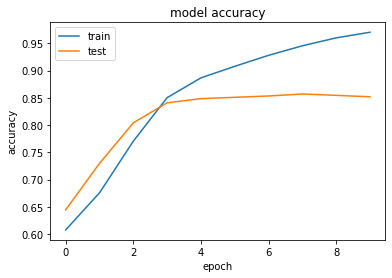

In [42]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

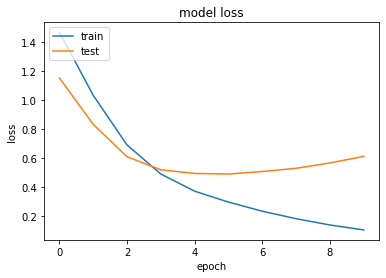

In [43]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [46]:
#تست مدلمون به صورت دستی
#این دانلود پکیج فراموش نشود
nltk.download('punkt')
import nltk
from nltk.tokenize import word_tokenize
from keras.preprocessing.text import Tokenizer as tokenizer

# function to return key for any value
def get_key(val):
	for key, value in tag2idx.items():
		if val == value:
			return key


print("یک جمله میگیریم و توکنایز میکنیم************")
new_complaint = 'بیا بریم دشت'
X= word_tokenize(new_complaint)
print(X)
print("کلمات جمله رو ایندکس گذاری و پد میزنیم تا طول 50 برای یک جمله*********************")
X = [word2idx[w] for w in X] 
print(X)
X = pad_sequences(maxlen=max_len, sequences=[X], padding="post", value=num_words - 1)
print(X)
print("پیشگویی*************")
pred = model.predict(X)
print("طول آرایه حاصل از پردیکت جمله ورودی  ",len(pred))
#ازونجایی که کلا یک جمله داریم پسهمیشه در اینجا درایه اول صفر هست و درایه دوم نشانگر کلمه
print('بردار پیشبینی شده برای جمله صفرم و کلمه صفرم',pred[0,0])
print(' ایندکس تگ مربوط به جمله صفرم و کلمه صفرم',np.argmax(pred[0,0]))





print("پردیکت روی مجموعه تست********")
pred = model.predict(X_test)

print("پیشبینی تگ جمله هشتادم مجموعه تست و کلمه دوم",pred[80,2])
print("ایندکس پیشبینی تگ مربوط به کلمه دوم جمله هشتادم مجموعه تست: ",np.argmax(pred[80,2]))
print("تگ پیشبینی شده مربوط به کلمه دوم جمله هشتادم از مجموعه تست",get_key(np.argmax(pred[80,2])))
print("کد واقعی وان هات تگ مربوط به کلمه دوم جمله هشتادم مجموعه تست",(np.array(y_test))[80,2])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
یک جمله میگیریم و توکنایز میکنیم************
['بیا', 'بریم', 'دشت']
کلمات جمله رو ایندکس گذاری و پد میزنیم تا طول 50 برای یک جمله*********************
[14806, 17576, 6114]
[[14806 17576  6114 20745 20745 20745 20745 20745 20745 20745 20745 20745
  20745 20745 20745 20745 20745 20745 20745 20745 20745 20745 20745 20745
  20745 20745 20745 20745 20745 20745 20745 20745 20745 20745 20745 20745
  20745 20745 20745 20745 20745 20745 20745 20745 20745 20745 20745 20745
  20745 20745]]
پیشگویی*************
طول آرایه حاصل از پردیکت جمله ورودی   1
بردار پیشبینی شده برای جمله صفرم و کلمه صفرم [1.2397740e-05 2.8109571e-02 1.9573552e-05 3.9173659e-02 1.0170414e-02
 5.1197416e-01 4.9456052e-02 2.2679011e-05 3.2678605e-03 2.9236953e-06
 1.0510704e-02 1.3524911e-03 4.6325760e-05 2.6536773e-08 4.3527782e-02
 2.3716740e-01 3.3264994e-06 4.3471505e-06 2.7963049e-05 6.1576092e-03
 2.4450752e-05 3.781

In [47]:
#جملات جدید بدهید و برچسب اجزای سخن کلمات جمله را دریافت کنید.
import nltk
from nltk.tokenize import word_tokenize
#nltk.download('punkt')
from keras.preprocessing.text import Tokenizer as tokenizer
new_complaint = ' زندگی آسان است.'

def get_key(val):
	for key, value in tag2idx.items():
		if val == value:
			return key
def predict_sent(new_complaint):
  X= word_tokenize(new_complaint)
  print(X)
  X = [word2idx[w] for w in X] 
  print(X)
  X = pad_sequences(maxlen=max_len, sequences=[X], padding="post", value=num_words - 1)
  print(X)
  pred = model.predict(X)
  for w in range(len(pred[0])):
    print(get_key(np.argmax(pred[0,w])))

predict_sent(new_complaint)

['زندگی', 'آسان', 'است', '.']
[8121, 19630, 19847, 7742]
[[ 8121 19630 19847  7742 20745 20745 20745 20745 20745 20745 20745 20745
  20745 20745 20745 20745 20745 20745 20745 20745 20745 20745 20745 20745
  20745 20745 20745 20745 20745 20745 20745 20745 20745 20745 20745 20745
  20745 20745 20745 20745 20745 20745 20745 20745 20745 20745 20745 20745
  20745 20745]]
NE
ADJ
V
PUNC
H1
H1
H1
H1
H1
H1
H1
H1
H1
H1
H1
H1
H1
H1
H1
H1
H1
H1
H1
H1
H1
H1
H1
H1
H1
H1
H1
H1
H1
H1
H1
H1
H1
H1
H1
H1
H1
H1
H1
H1
H1
H1
H1
H1
H1
H1


In [ ]:
#سعی دارم میکنم ماتریس درهم امیختگی بسازم که همش به خاطر مولتی کلاس بودن خطا میگیرم

import sklearn
y_pred = model.predict(X_test)
confusion_matrix = sklearn.metrics.confusion_matrix(np.array(y_test), np.rint(y_pred))

In [ ]:
import seaborn as sns
from sklearn.metrics import multilabel_confusion_matrix
pred = model.predict(X_test)
cm = multilabel_confusion_matrix(np.array(y_test), pred)
f = sns.heatmap(cm, annot=True)

In [ ]:
y_test_non_category = [ np.argmax(t) for t in y_test ]
y_predict_non_category = [ np.argmax(t) for t in pred ]

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_non_category, y_predict_non_category)
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(keras_estimator,X_test, y_test_non_category,labels =sorted(tag2idx, key=tag2idx.get), normalize=False)  
plt.show()

In [66]:
def estimator(X):
  pred = model.predict(X)
  for w in range(len(pred[0])):
    print(get_key(np.argmax(pred[0,w]))
  pred=model.predict(X)
  y_predict_non_category = [ np.argmax(t) for t in pred ]
  return y_predict_non_category

In [ ]:
import tempfile
import tensorflow as tf
model_dir ='/content/saved_model'
keras_estimator = tf.keras.estimator.model_to_estimator(
    keras_model=model, model_dir=model_dir)

In [31]:
# میتونیم نتیجه ارزیابیو بخشهاشو جداگانه بریزیم تو متغیر که حالا فعلا استفاده نمیکنم
loss, accuracy, f1_score, precision, recall = model.evaluate(X_test, np.array(y_test), verbose=0)

In [40]:
# ارزیابی مدل روی مجموعه تست
print(len(y_train[0]))
score = model.evaluate(X_test, np.array(y_test), verbose=1)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

50
10/10 [==============================] - 0s 33ms/step - loss: 0.5772 - accuracy: 0.8612 - f1_m: 0.8666 - precision_m: 0.8905 - recall_m: 0.8441
Test loss: 0.5772271156311035 / Test accuracy: 0.8611842393875122
